# Creating dataframe

In [1]:
!pip install pyarrow
!pip install pandas

In [2]:
import pandas as pd
import pyarrow
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2, VarianceThreshold
import sklearn.linear_model

In [3]:
df = pd.read_parquet('hip-ccg.parquet', engine='pyarrow',  use_nullable_dtypes=True)

In [4]:
# if you have larger tables, adjust these settings to enable scrolling
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)
pd.set_option("display.precision", 2)

In [19]:
# To plot pretty figures directly within Jupyter
%matplotlib inline

# choose your own style: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
plt.style.use("seaborn-whitegrid")

# Go to town with https://matplotlib.org/tutorials/introductory/customizing.html
# plt.rcParams.keys()
mpl.rc("axes", labelsize=14, titlesize=14)
mpl.rc("figure", titlesize=20)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

# contants for figsize
S = (8, 8)
M = (12, 12)
L = (14, 14)
XL = (32,32)
XXL = (64,64)

# Verkenning dataset

In [6]:
df.sample(1)

,provider_code,procedure,revision_flag,year,age_band,gender,t0_assisted,t0_assisted_by,t0_symptom_period,t0_previous_surgery,t0_living_arrangements,t0_disability,heart_disease,high_bp,stroke,circulation,lung_disease,diabetes,kidney_disease,nervous_system,liver_disease,cancer,depression,arthritis,t0_mobility,t0_self_care,t0_activity,t0_discomfort,t0_anxiety,t0_eq5d_index_profile,t0_eq5d_index,t1_assisted,t1_assisted_by,t1_living_arrangements,t1_disability,t1_mobility,t1_self_care,t1_activity,t1_discomfort,t1_anxiety,t1_satisfaction,t1_sucess,t1_allergy,t1_bleeding,t1_wound,t1_urine,t1_further_surgery,t1_readmitted,t1_eq5d_index_profile,t1_eq5d_index,ohs_eq5d_index_t1_predicted,t0_eq_vas,t1_eq_vas,ohs_eq_vas_t1_predicted,ohs_t0_pain,ohs_t0_sudden_pain,ohs_t0_night_pain,ohs_t0_washing,ohs_t0_transport,ohs_t0_dressing,ohs_t0_shopping,ohs_t0_walking,ohs_t0_limping,ohs_t0_stairs,ohs_t0_standing,ohs_t0_work,ohs_t0_score,ohs_t1_pain,ohs_t1_sudden_pain,ohs_t1_night_pain,ohs_t1_washing,ohs_t1_transport,ohs_t1_dressing,ohs_t1_shopping,ohs_t1_walking,ohs_t1_limping,ohs_t1_stairs,ohs_t1_standing,ohs_t1_work,ohs_t1_score,ohs_ohs_t1_predicted
53183,04C,Hip Replacement,0,2017/18,60 to 69,2.0,2,0,1,2,2,2,9,1,9,9,9,9,9,9,9,9,9,1,2,1,2,3,2,21232,0.09,2,9,2,1,2,1,2,1,1,4,2,1,9,9,9,1,1,21211,0.81,0.82,40,75,75.02,0,0,0,2,1,1,2,0,0,2,1,1,10.0,3,3,4,4,2,3,3,3,2,3,3,4,37.0,39.34


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122294 entries, 0 to 122293
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   provider_code                122294 non-null  category
 1   procedure                    122294 non-null  category
 2   revision_flag                122294 non-null  UInt8   
 3   year                         122294 non-null  category
 4   age_band                     115948 non-null  category
 5   gender                       115948 non-null  float32 
 6   t0_assisted                  122294 non-null  UInt8   
 7   t0_assisted_by               122294 non-null  UInt8   
 8   t0_symptom_period            122294 non-null  UInt8   
 9   t0_previous_surgery          122294 non-null  UInt8   
 10  t0_living_arrangements       122294 non-null  UInt8   
 11  t0_disability                122294 non-null  UInt8   
 12  heart_disease                122294 non-null

In [23]:
#percentage nan voor iedere variabele 
pctg_nan = df.isna().mean().round(4) * 100
print(pctg_nan)

provider_code                   0.00
procedure                       0.00
revision_flag                   0.00
year                            0.00
age_band                        5.19
gender                          5.19
t0_assisted                     0.00
t0_assisted_by                  0.00
t0_symptom_period               0.00
t0_previous_surgery             0.00
t0_living_arrangements          0.00
t0_disability                   0.00
heart_disease                   0.00
high_bp                         0.00
stroke                          0.00
circulation                     0.00
lung_disease                    0.00
diabetes                        0.00
kidney_disease                  0.00
nervous_system                  0.00
liver_disease                   0.00
cancer                          0.00
depression                      0.00
arthritis                       0.00
t0_mobility                     0.00
t0_self_care                    0.00
t0_activity                     0.00
t

Opvallend weinig NAN values --> vermoeden dat de nan is vervangen met een cijfer, bijvoorbeeld 9999

In [7]:
#bekijken wat de unieke waarden zijn van verschillende variabelen
#df.gender.unique() #nan 1 en 2
#df.provider_code.unique() --> 292 varianten dus feature exclusion
#df.age_band.unique() # zijn categorien gemaakt van 9 jaar, met 90 tm 120

#simpele for loop om bij alle kolommen de unieke waarden te vinden

for i in df.columns:
    print(i)
    print(df[f"{i}"].unique())



provider_code
['00C', '00D', '00J', '00K', '00L', ..., '03Y', '04J', '04R', '99P', '99Q']
Length: 198
Categories (198, object): ['00C', '00D', '00J', '00K', ..., '04J', '04R', '99P', '99Q']
procedure
['Hip Replacement']
Categories (1, object): ['Hip Replacement']
revision_flag
<IntegerArray>
[0, 1]
Length: 2, dtype: UInt8
year
['2018/19', '2017/18', '2016/17']
Categories (3, object): ['2018/19', '2017/18', '2016/17']
age_band
[NaN, '60 to 69', '70 to 79', '80 to 89', '40 to 49', '50 to 59', '30 to 39', '90 to 120']
Categories (7, object): ['60 to 69', '70 to 79', '80 to 89', '40 to 49', '50 to 59', '30 to 39', '90 to 120']
gender
[nan  1.  2.]
t0_assisted
<IntegerArray>
[2, 1, 9]
Length: 3, dtype: UInt8
t0_assisted_by
<IntegerArray>
[0]
Length: 1, dtype: UInt8
t0_symptom_period
<IntegerArray>
[4, 2, 3, 1, 9]
Length: 5, dtype: UInt8
t0_previous_surgery
<IntegerArray>
[2, 1, 9]
Length: 3, dtype: UInt8
t0_living_arrangements
<IntegerArray>
[1, 2, 4, 9, 3]
Length: 5, dtype: UInt8
t0_disabi

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
revision_flag,122294.0,0.05,0.22,0.00,0.00,0.00,0.00,1.00
gender,115948.0,1.61,0.49,1.00,1.00,2.00,2.00,2.00
t0_assisted,122294.0,1.92,0.82,1.00,2.00,2.00,2.00,9.00
t0_assisted_by,122294.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
t0_symptom_period,122294.0,2.19,0.95,1.00,2.00,2.00,2.00,9.00
t0_previous_surgery,122294.0,1.97,0.66,1.00,2.00,2.00,2.00,9.00
t0_living_arrangements,122294.0,1.37,1.00,1.00,1.00,1.00,2.00,9.00
t0_disability,122294.0,1.90,1.84,1.00,1.00,1.00,2.00,9.00
heart_disease,122294.0,8.31,2.25,1.00,9.00,9.00,9.00,9.00
high_bp,122294.0,5.96,3.88,1.00,1.00,9.00,9.00,9.00


vermoeden mbt nan values lijkt te worden bevestigd, omdat het overal de max value is. Nu nog plotten om te zien waar de negens zich bevinden, dus zijn het echt nan values of outliers

# Verkenning dmv figuren

In [11]:
import altair as alt

In [12]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [13]:
import seaborn as sns

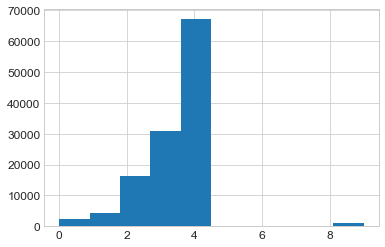

In [14]:
df["ohs_t1_stairs"].hist()

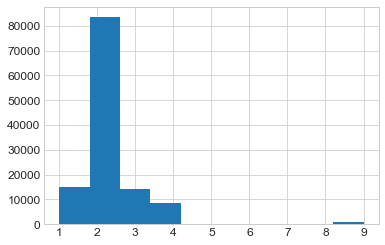

In [15]:
df["t0_symptom_period"].hist()


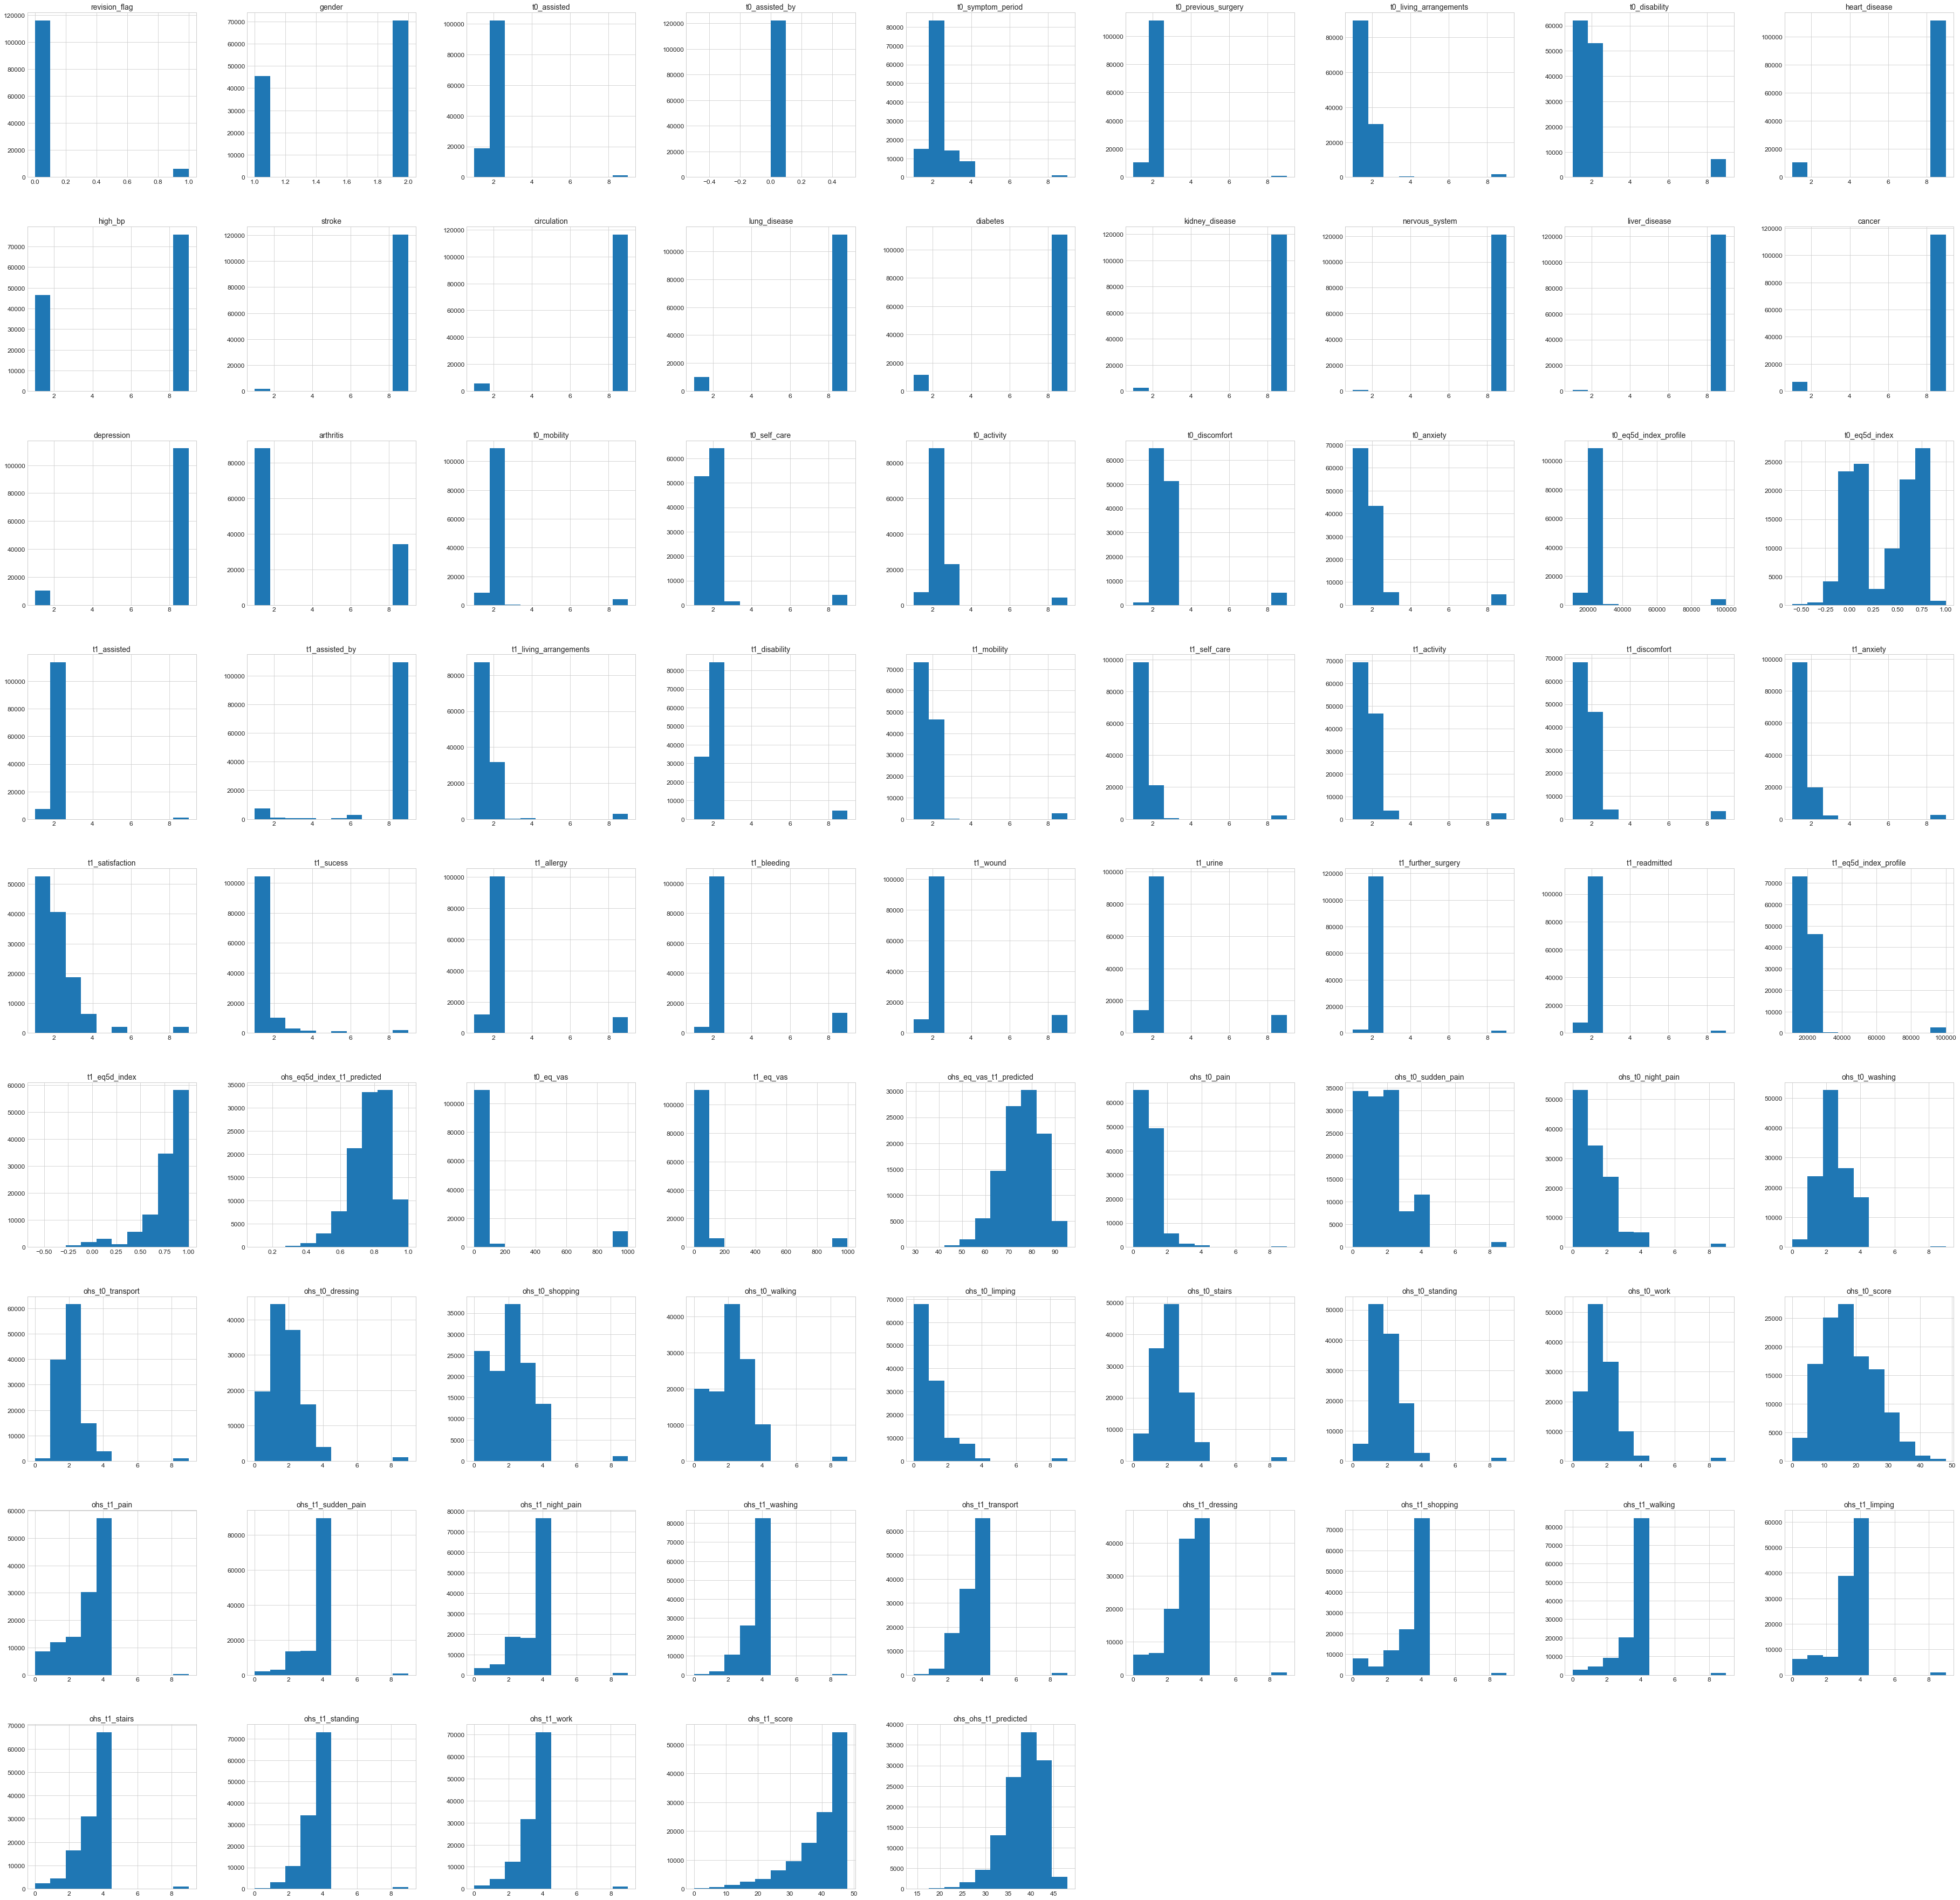

In [24]:
df.loc[:,df.columns].hist(figsize=XXL);

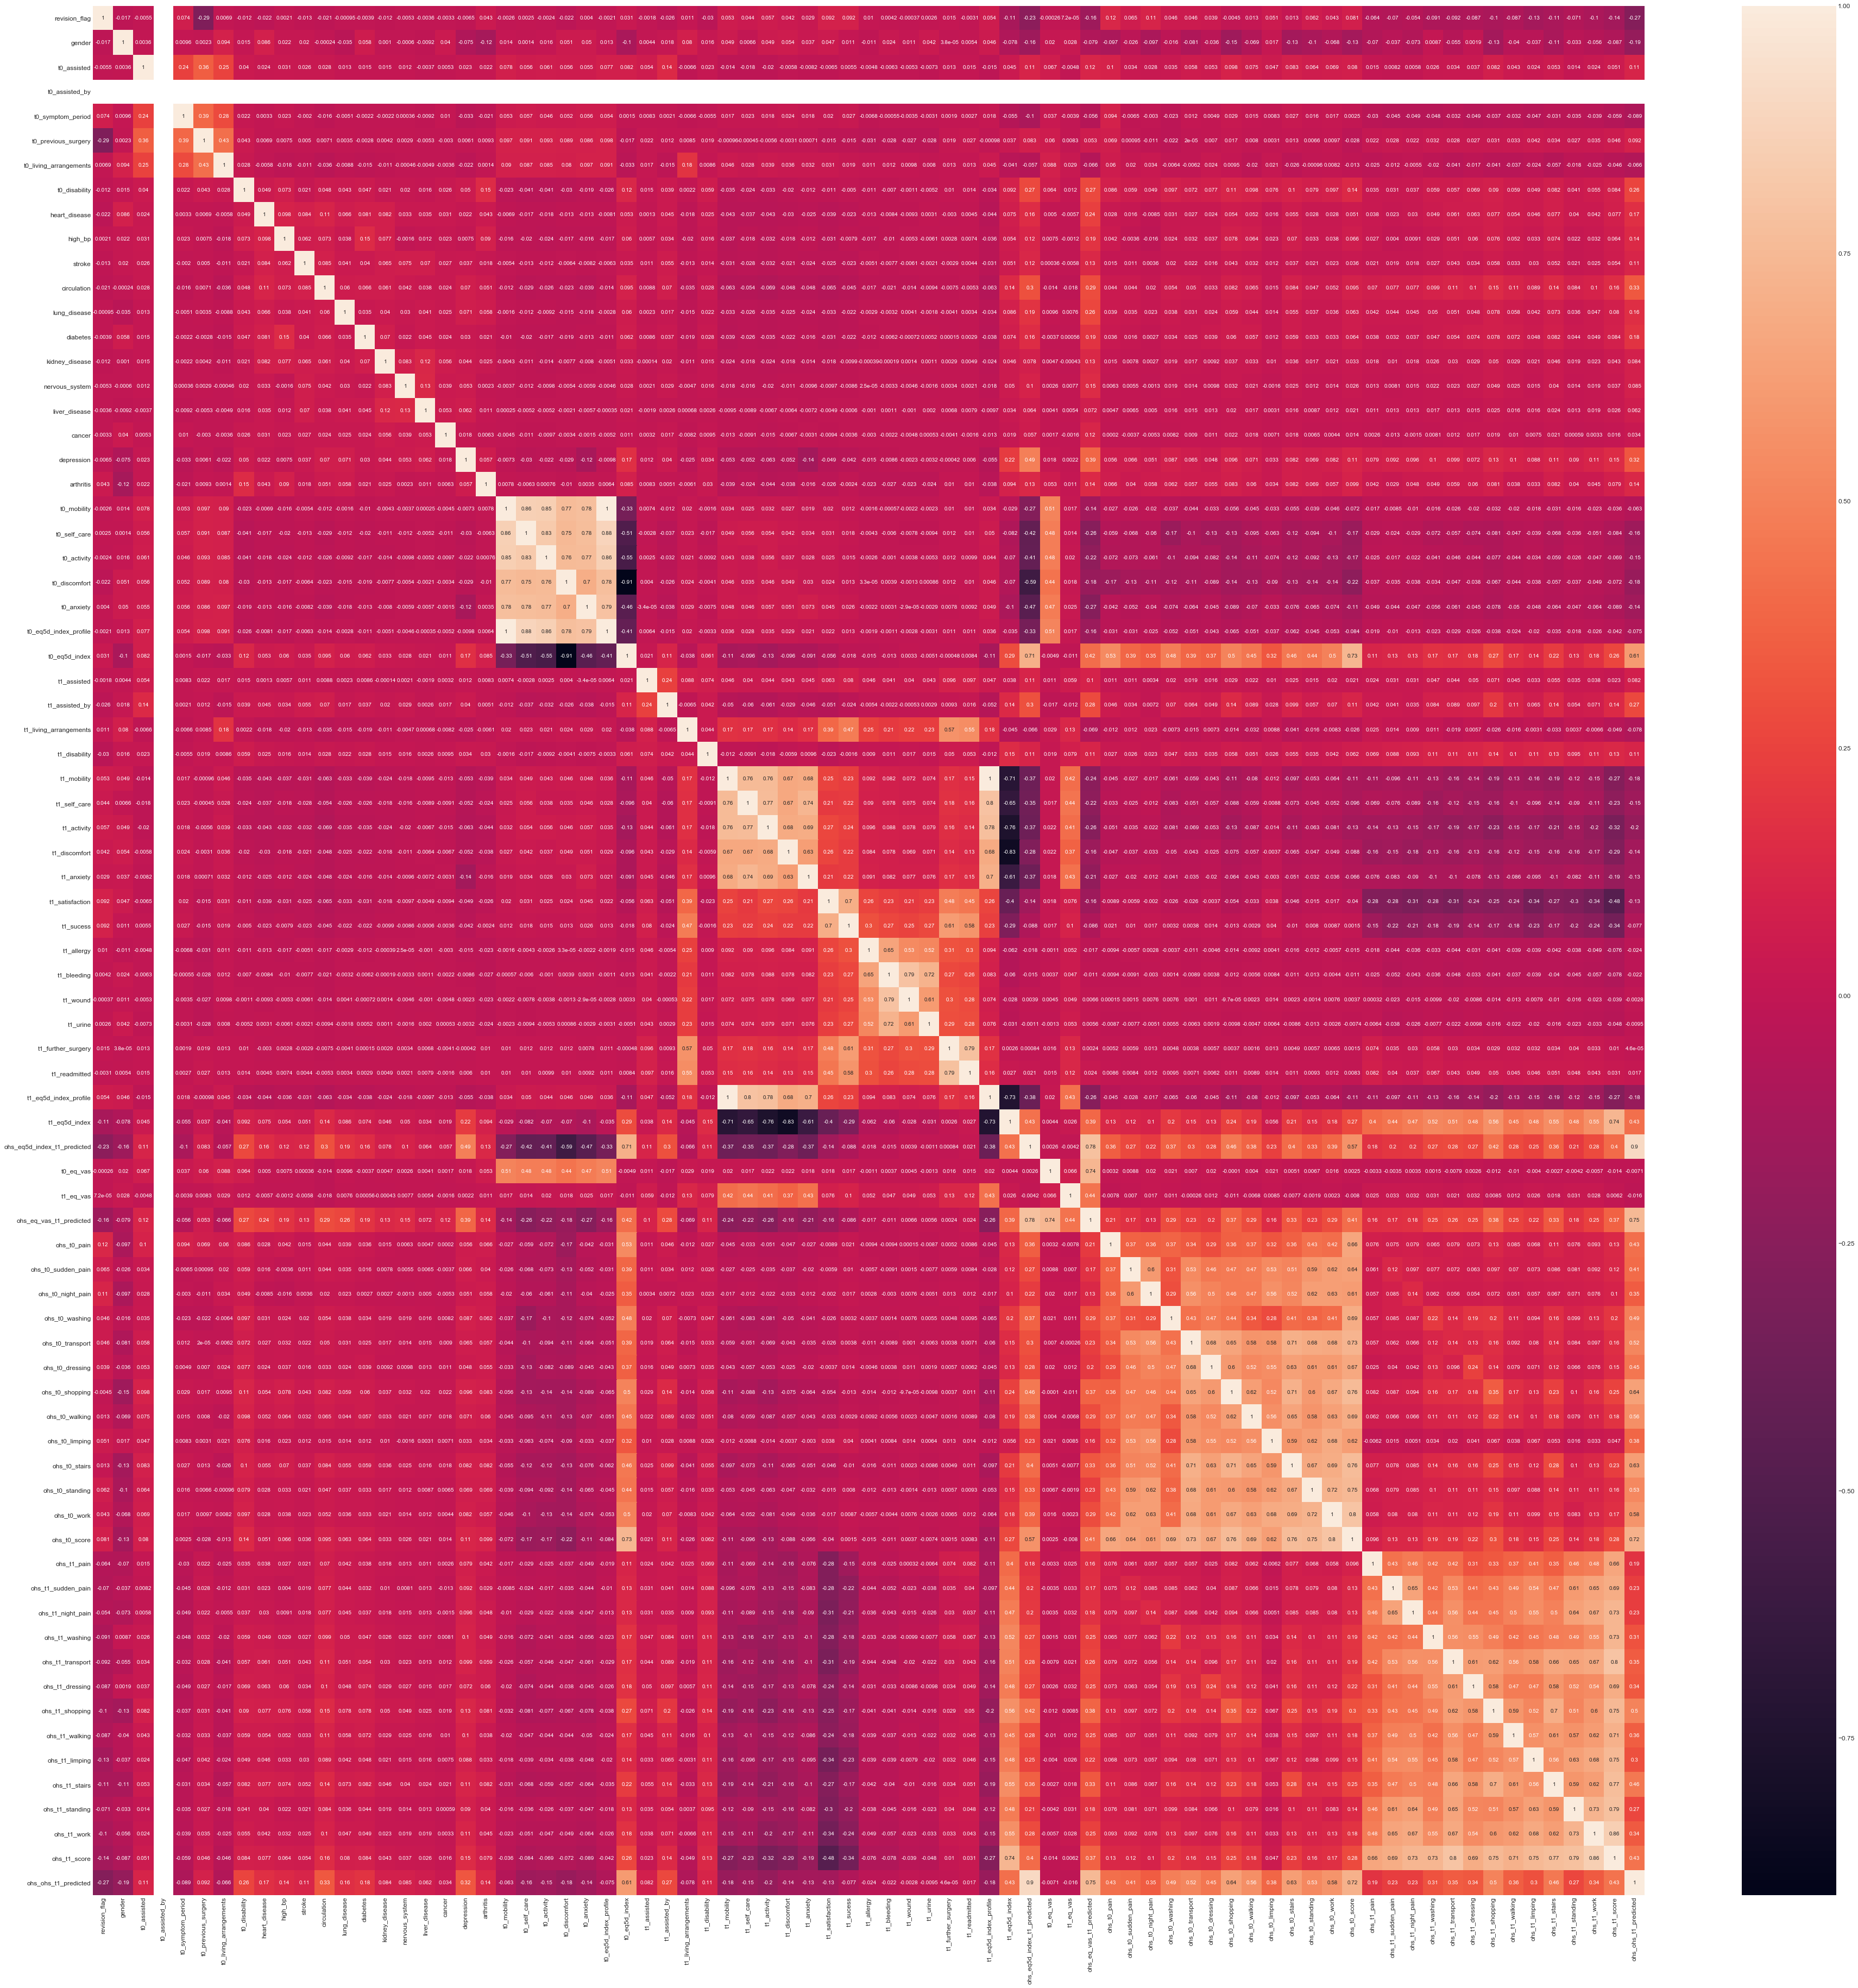

In [20]:
plt.figure(figsize=XXL)
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
#plt.figure(figsize=XL)
plt.show()

Op basis van bovenstaande analyses duidelijk wat nan values moeten worden, alle 9  uitkomsten en 99.
Verder is inzichtelijk dat alles met een t0 en t1 meting een uitkomst maat is. Voor de tijdsmetingen een correlatieplot zoals bovenstaand maken

In [25]:
df.columns

Index(['provider_code', 'procedure', 'revision_flag', 'year', 'age_band',
       'gender', 't0_assisted', 't0_assisted_by', 't0_symptom_period',
       't0_previous_surgery', 't0_living_arrangements', 't0_disability',
       'heart_disease', 'high_bp', 'stroke', 'circulation', 'lung_disease',
       'diabetes', 'kidney_disease', 'nervous_system', 'liver_disease',
       'cancer', 'depression', 'arthritis', 't0_mobility', 't0_self_care',
       't0_activity', 't0_discomfort', 't0_anxiety', 't0_eq5d_index_profile',
       't0_eq5d_index', 't1_assisted', 't1_assisted_by',
       't1_living_arrangements', 't1_disability', 't1_mobility',
       't1_self_care', 't1_activity', 't1_discomfort', 't1_anxiety',
       't1_satisfaction', 't1_sucess', 't1_allergy', 't1_bleeding', 't1_wound',
       't1_urine', 't1_further_surgery', 't1_readmitted',
       't1_eq5d_index_profile', 't1_eq5d_index', 'ohs_eq5d_index_t1_predicted',
       't0_eq_vas', 't1_eq_vas', 'ohs_eq_vas_t1_predicted', 'ohs_t0_pain

In [40]:
#create a dataframe of time outcomes
df_outcomes = df.filter(like='t0' or 't1') 

In [41]:
df_outcomes.columns

Index(['t0_assisted', 't0_assisted_by', 't0_symptom_period',
       't0_previous_surgery', 't0_living_arrangements', 't0_disability',
       't0_mobility', 't0_self_care', 't0_activity', 't0_discomfort',
       't0_anxiety', 't0_eq5d_index_profile', 't0_eq5d_index', 't0_eq_vas',
       'ohs_t0_pain', 'ohs_t0_sudden_pain', 'ohs_t0_night_pain',
       'ohs_t0_washing', 'ohs_t0_transport', 'ohs_t0_dressing',
       'ohs_t0_shopping', 'ohs_t0_walking', 'ohs_t0_limping', 'ohs_t0_stairs',
       'ohs_t0_standing', 'ohs_t0_work', 'ohs_t0_score'],
      dtype='object')

In [42]:
df_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122294 entries, 0 to 122293
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   t0_assisted             122294 non-null  UInt8  
 1   t0_assisted_by          122294 non-null  UInt8  
 2   t0_symptom_period       122294 non-null  UInt8  
 3   t0_previous_surgery     122294 non-null  UInt8  
 4   t0_living_arrangements  122294 non-null  UInt8  
 5   t0_disability           122294 non-null  UInt8  
 6   t0_mobility             122294 non-null  UInt8  
 7   t0_self_care            122294 non-null  UInt8  
 8   t0_activity             122294 non-null  UInt8  
 9   t0_discomfort           122294 non-null  UInt8  
 10  t0_anxiety              122294 non-null  UInt8  
 11  t0_eq5d_index_profile   122294 non-null  Int64  
 12  t0_eq5d_index           115412 non-null  float32
 13  t0_eq_vas               122294 non-null  UInt16 
 14  ohs_t0_pain         

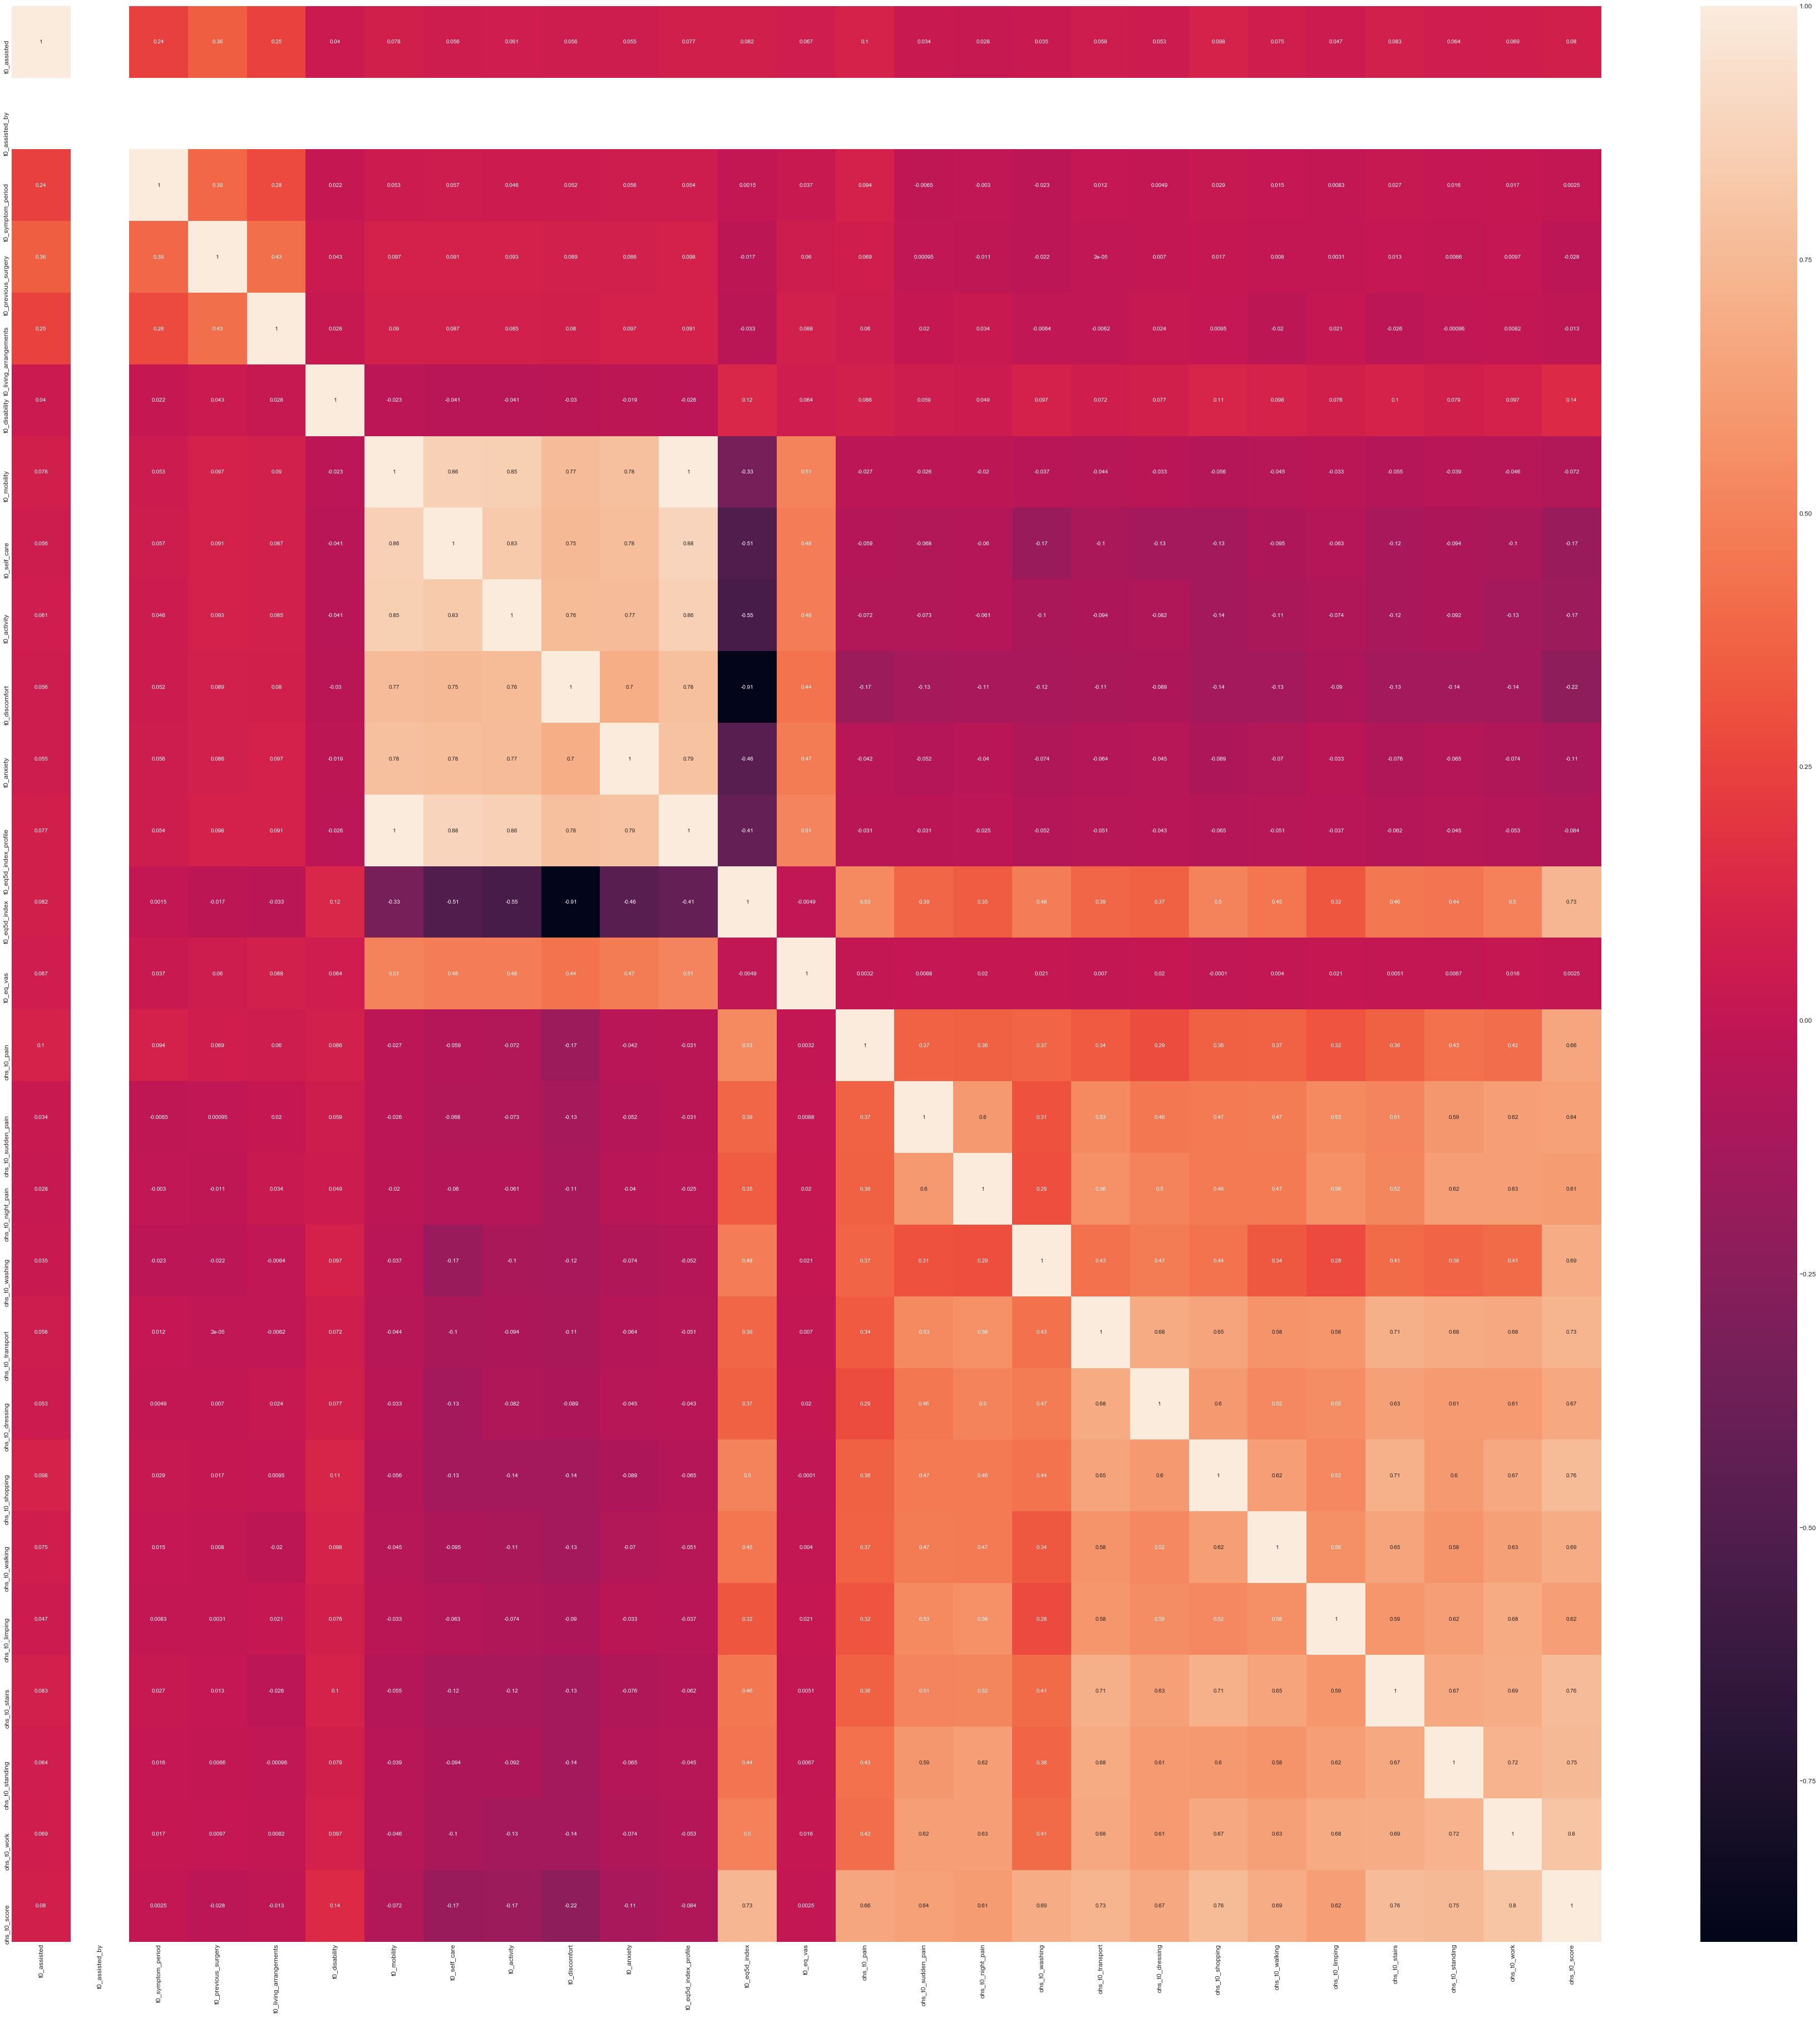

In [43]:
# het zijn allemaal cijfers dus een corr matrix moet het goede resultaat opleveren
plt.figure(figsize=XXL)
corrMatrix = df_outcomes.corr()
sns.heatmap(corrMatrix, annot=True)
#plt.figure(figsize=XL)
plt.show()
#licht oranje tot wit en donker paars tot zwart zijn de hoogste correlaties,
#de eq vas is met veel positief variabelen gecorreleerd en de e15 index negatief, de eq5 indexprofile is dan weer positief sterk gecorreleerd met veel variabelen

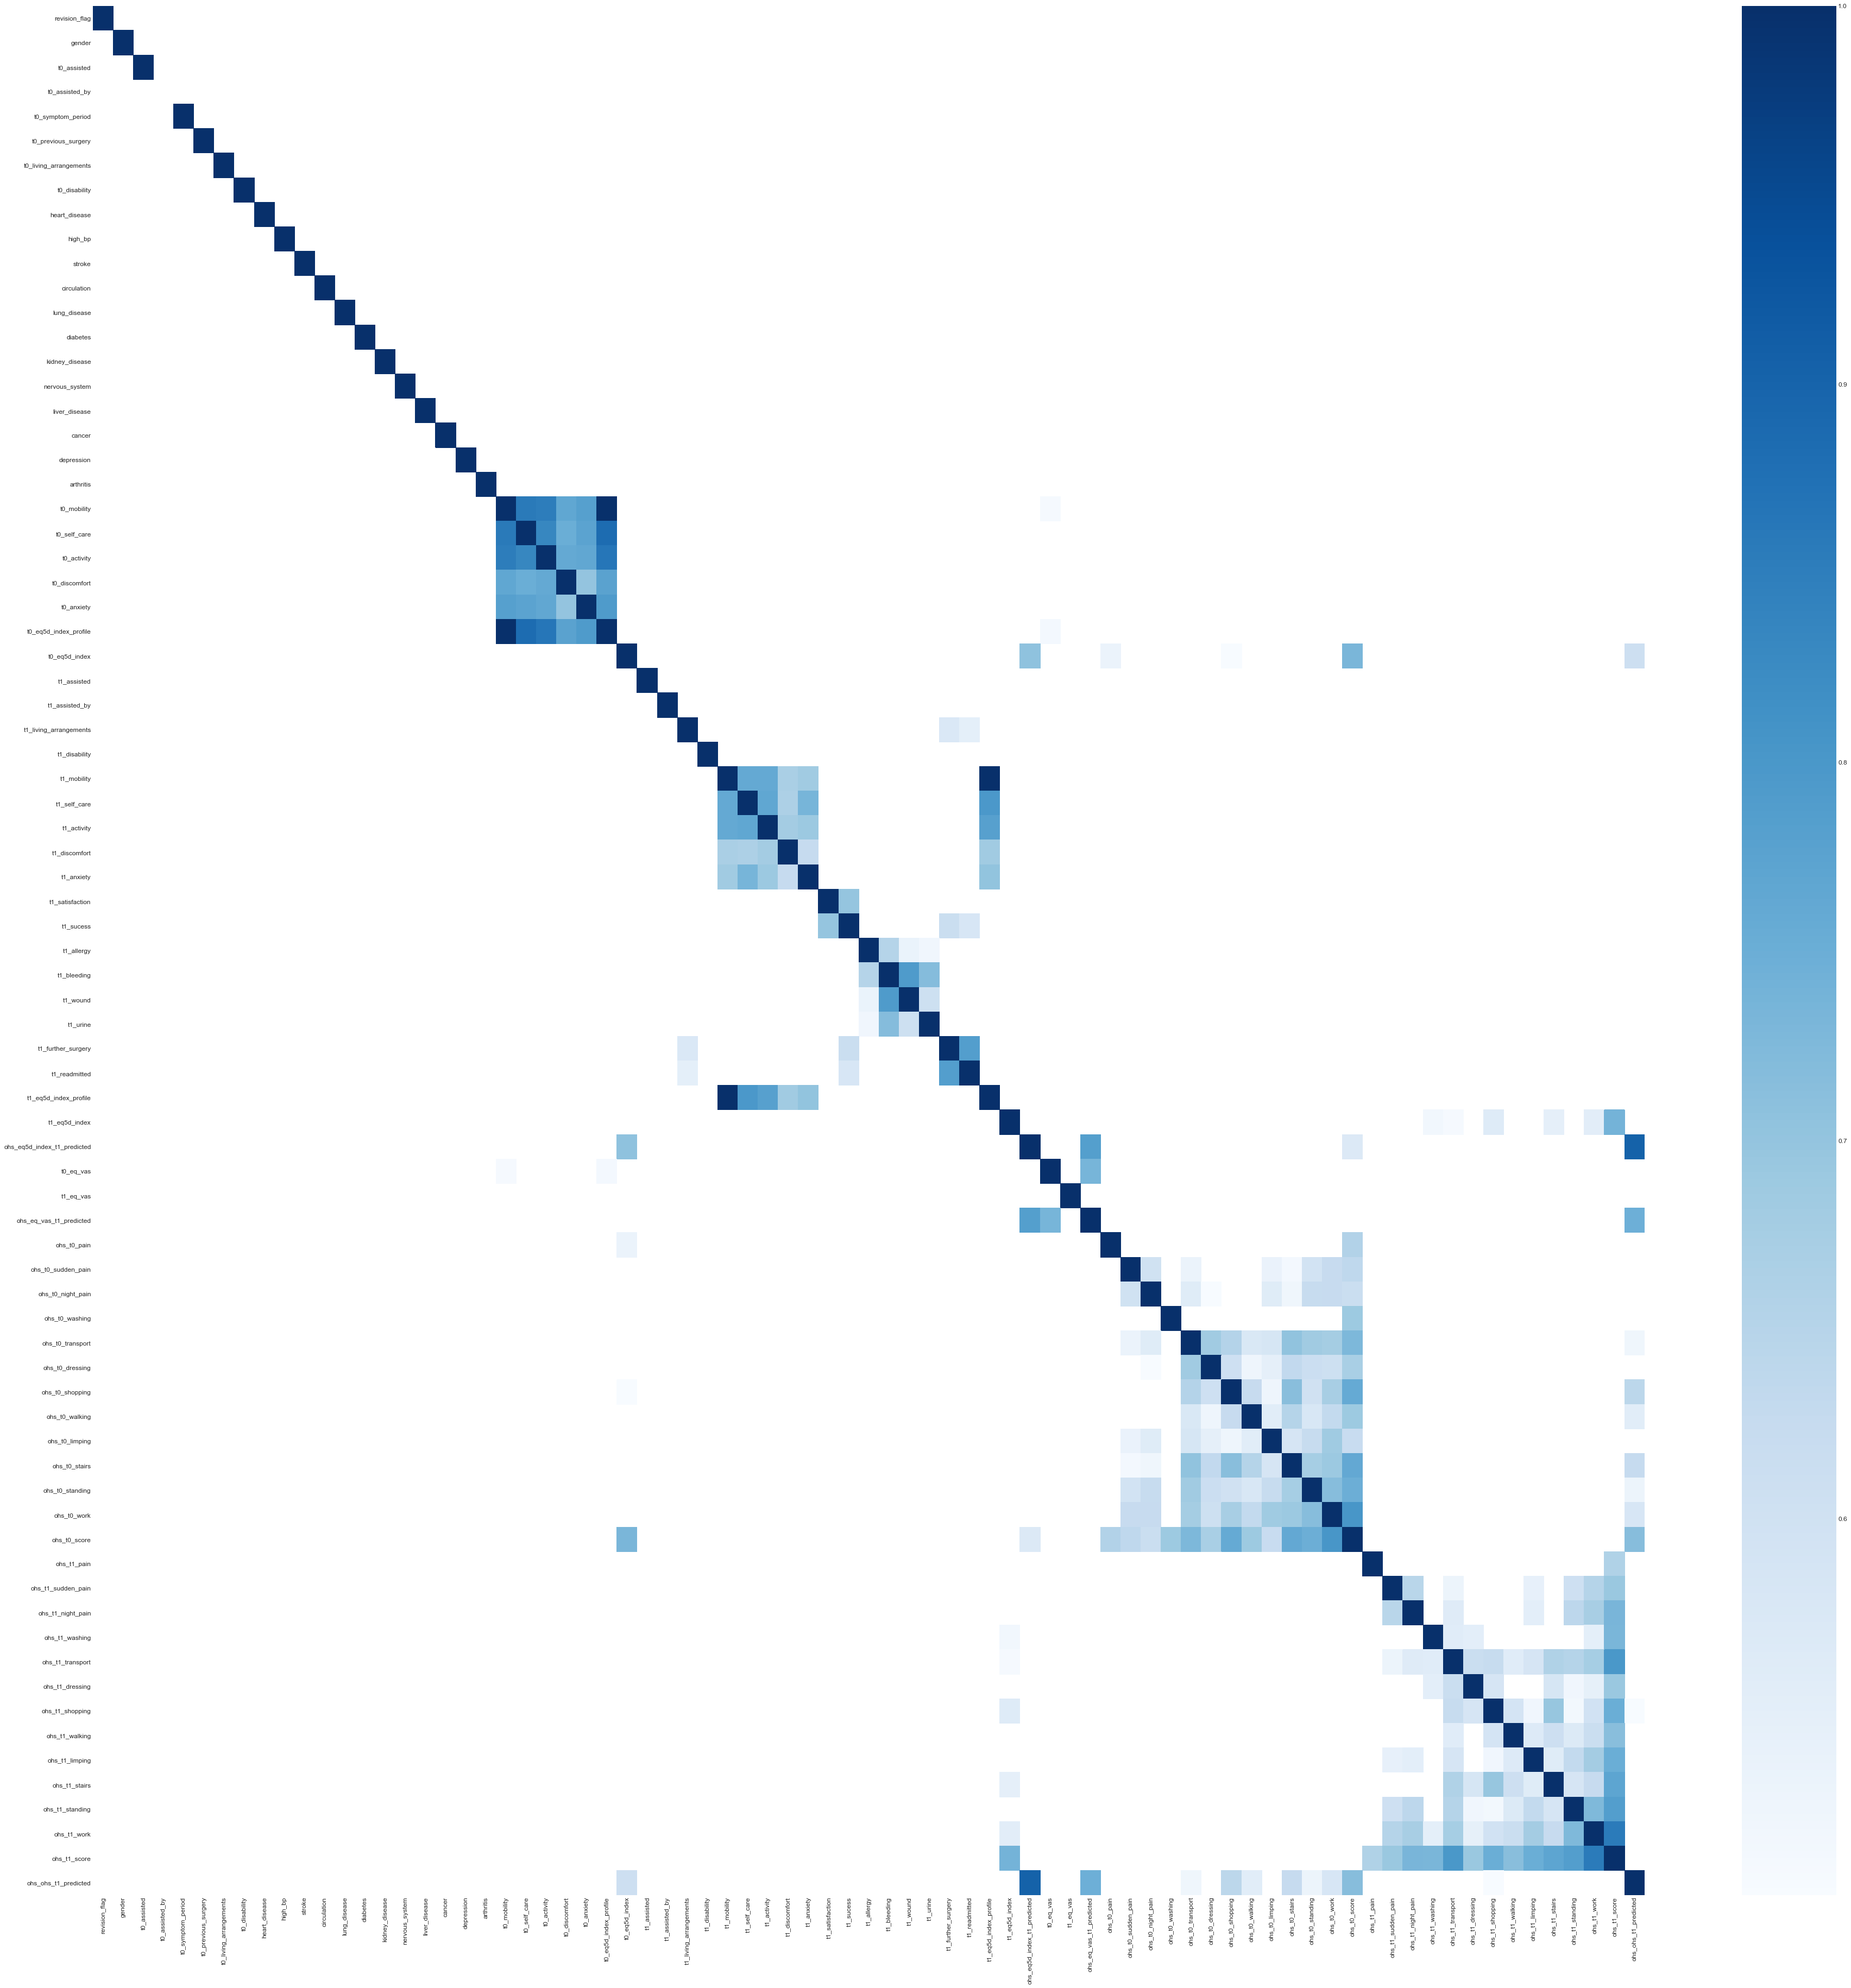

In [55]:
#bovenstaande lastig te zien, daarom custom met alleen oplichting wanneer >0.5
corr = df.corr()
kot = corr[corr>=.5]
plt.figure(figsize=XXL)
sns.heatmap(kot, cmap="Blues")

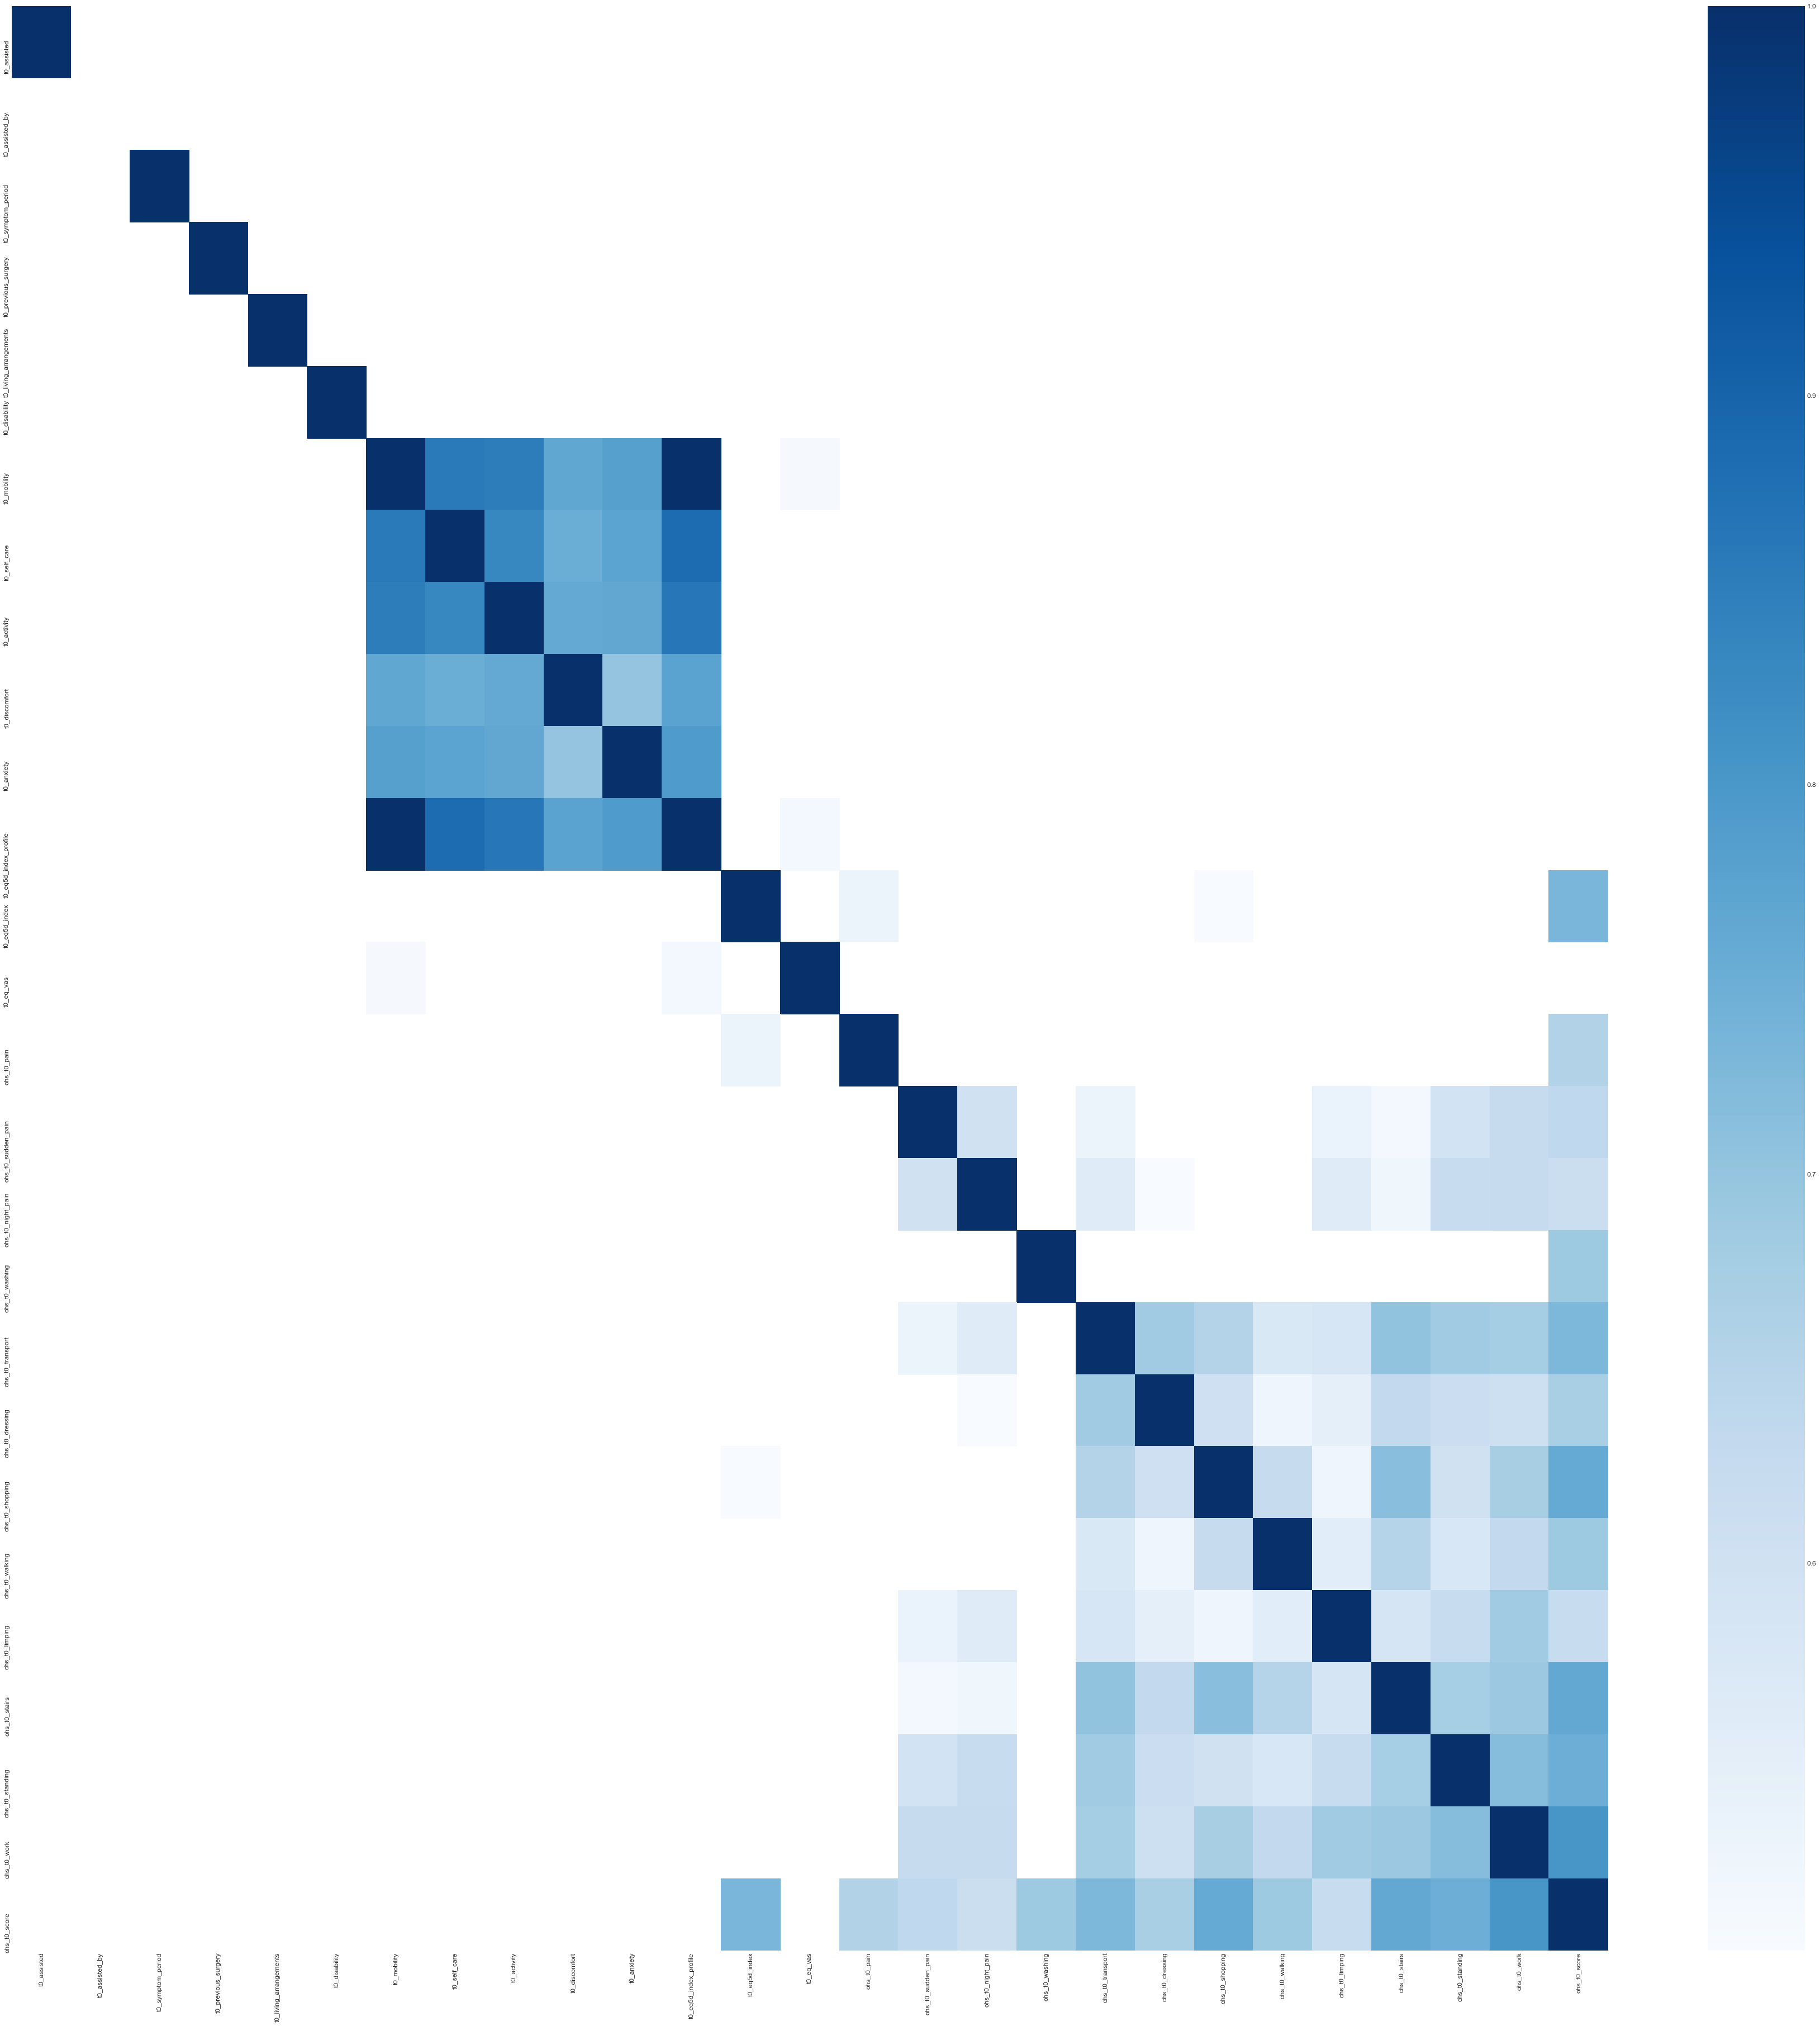

In [53]:
#bovenstaande lastig te zien, daarom custom met alleen oplichting wanneer >0.5 voor de outcomes
corr = df_outcomes.corr()
kot2 = corr[corr>=.5]
plt.figure(figsize=XXL)
sns.heatmap(kot2, cmap="Blues")

In [ ]:
#zelfde idee, maar nu met scatterplots
pd.plotting.scatter_matrix(df_outcomes, diagonal='kde')